# <center>Определение параметров адаптивных моделей</center> 

Параметры адаптивных моделей ($\alpha, \beta, \gamma, \phi$) выбираются таким образом, чтобы ошибка при аппроксимации полученной моделью была как можно меньше, т.е. необходимо решить задачу оптимизации.

## Оптимизация в <a href='https://www.scipy.org/'>SciPy</a>

Решать задачи оптимизации позволяет библиотека SciPy. Алгоритмы оптимизации лежат в модуле `scipy.optimize`. Найдем минимум следующей функции:

$$f(x)=x^2+2x^4-3x.$$

In [1]:
def fun(x):
    return x**2 + 2*x**4 - 3*x

Воспользуемся функцией `minimize` из указанного модуля. В данной функции реализованы численные методы решения задач оптимизации. В качестве первого аргумента `minimize` принимает функцию, минимум которой необходимо найти, а в качестве второго аргумента &ndash; начальное значение переменных.

In [2]:
from scipy.optimize import minimize

In [3]:
result = minimize(fun, 0)
result

      fun: -1.1810421376911344
 hess_inv: array([[0.09247045]])
      jac: array([-3.03983688e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([0.60670554])

Значение целевой функции и оптимальное значение $x$:

In [4]:
result.fun, result.x

(-1.1810421376911344, array([0.60670554]))

Функция нескольких переменных может быть передана в `minimize` двумя способами:

In [5]:
def fun1(x1, x2):
    return x1**2 + 2*x1*x2 + x2**2

In [6]:
minimize(lambda x: fun1(x[0], x[1]), (2,2))

      fun: 2.8552400645473715e-15
 hess_inv: array([[ 0.62499999, -0.375     ],
       [-0.375     ,  0.62500001]])
      jac: array([-9.19677317e-08, -9.19677317e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 5.67418834e-08, -1.10176330e-07])

In [7]:
fun2 = lambda x: x[0]**2 + 2*x[0]*x[1] + x[1]**2

In [8]:
minimize(fun2, (2,2))

      fun: 2.8552400645473715e-15
 hess_inv: array([[ 0.62499999, -0.375     ],
       [-0.375     ,  0.62500001]])
      jac: array([-9.19677317e-08, -9.19677317e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 5.67418834e-08, -1.10176330e-07])

Можно указать ограничения на значения переменных с помощью опций `constraints` и `bounds`.

In [9]:
fun3 = lambda x: x[0] + x[1]

In [10]:
# x1 >= 0, x2 >= 0
bnds = ((0,None),(0,None))

# 3*x1 + 2*x2 >= 7
# x1 + 2*x2 >= 6
cons = ({'type': 'ineq', 'fun': lambda x: 3*x[0] + 2*x[1] - 7},
        {'type': 'ineq', 'fun': lambda x: x[0] + 2*x[1] - 6})

In [11]:
minimize(fun3, (2,2), bounds=bnds, constraints=cons)

     fun: 3.2500000000000004
     jac: array([1., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.5 , 2.75])

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
<ul>1. Определите функцию, которая принимает на вход временной ряд и параметры модели Хольта для линейного тренда (см. задание 2 с предыдущего занятия). Данная функция должна возвращать среднеквадратичную ошибку модели.</ul>
<ul>2. Определите оптимальные параметры $\alpha$ и $\beta$ для ряда объемов пассажирских авиаперевозок в Австралии (файл ausair.csv). Постройте модель Хольта с найденными параметрами и получите прогноз на 10 лет вперед.</ul>
<p></p>
  
</div>

<div class="alert alert-warning">

<p></p>
Если на предыдущем занятии не удалось оформить модель Хольта в виде функции:    
    
<ul>1. Определите функцию, которая принимает на вход два одномерных массива и возвращает среднеквадратичную ошибку.</ul>
    
<ul>2. Определите сетку возможных параметров $\alpha$ и $\beta$ с помощью np.linspace.</ul>
    
<ul>3. Путем перебора различных комбинаций параметров $\alpha$ и $\beta$ выберите оптимальные с т.з. значения среднеквадратичной ошибки параметры. </ul>
<p></p>
  
</div>

In [12]:
def holt(alfa,beta):
    data = pd.read_csv('ausair.csv')
    data = list(data['Passengers'])
    b_n = data[1] - data[0]
    a_f = data[0]
    a_n = data[0]
    data_prom = [a_n]
    n = len(data)
    for i in range(1,len(data)):
        data_prom.append(a_n+b_n)
        a_n = alfa*data[i]+(1-alfa)*(a_n+b_n)
        b_n = beta*(a_n-a_f)+(1-beta)*b_n
        a_f = a_n
        
    error = 1/n * sum((numpy.array(data[1:])-numpy.array(data_prom[:-1]))**2)
    return error

In [13]:
import pandas as pd
import numpy 
data = pd.read_csv('ausair.csv')
info_data = list(data['Passengers'])
holt(0.59 , 0.43)

10.142677281283994

In [14]:
bnds=((0,1),(0,1))
minimize(lambda x: holt(x[0], x[1]), (0,0),bounds=bnds)

      fun: 9.841066897840715
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.76996262e-06, -7.99360578e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 48
      nit: 15
   status: 0
  success: True
        x: array([0.83865144, 0.28304001])

In [15]:
bnds = ((0,1),(0,1))
result = minimize(lambda x: holt(x[0], x[1]), (0,0), bounds=bnds)
alpha1, beta1 = result.x
result.fun, result.x

(9.841066897840715, array([0.83865144, 0.28304001]))

In [16]:
def holt_3(alfa,beta,years):
    data = pd.read_csv('ausair.csv')
    info_data = list(data['Passengers'])
    info_data_real = copy.deepcopy(info_data)
    data = list(data['Passengers'])
    
    
    
    b_n = data[1] - data[0]
    a_f = data[0]
    a_n = data[0]
    data_prom = [a_n]
    n = len(data)
    
    for i in range(1,len(data)):
        data_prom.append(a_n+b_n)
        a_n = alfa*data[i]+(1-alfa)*(a_n+b_n)
        b_n = beta*(a_n-a_f)+(1-beta)*b_n
        a_f = a_n
    
    n_1 = a_n+b_n;n_1
    data_prom.append(n_1)
    for i in range(years):
        a_n = alfa*data_prom[-1]+(1-alfa)*(a_n+b_n)
        b_n = beta*(a_n-a_f)+(1-beta)*b_n
        a_f = a_n
        data_prom.append(a_n+b_n)
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12,5, forward=True)
    plt.plot(info_data_real)
    plt.plot(data_prom)
    plt.legend()
    plt.show()
    return data_prom

No handles with labels found to put in legend.


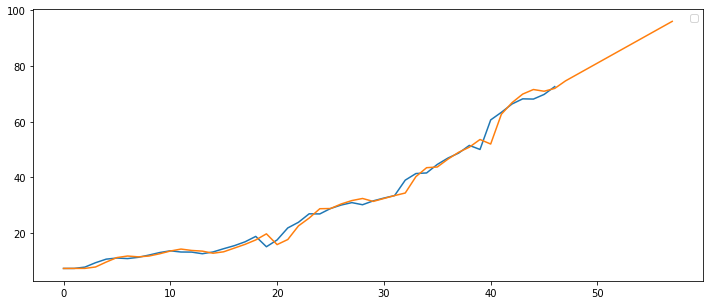

[7.32,
 7.33,
 7.34,
 7.8449707419360335,
 9.615889150647206,
 11.222940722468007,
 11.779019207858548,
 11.482862035646518,
 11.771438055576713,
 12.5800458619116,
 13.569732619126526,
 14.276820782504942,
 13.779428750689268,
 13.534101886528987,
 12.777984847979477,
 13.302392791314901,
 14.631142284981692,
 15.965906592556763,
 17.555587981349525,
 19.73920047922159,
 15.881284203968224,
 17.70123072659514,
 22.596639203067422,
 25.395976272909795,
 28.761279804942916,
 28.826531365755265,
 30.4648667552086,
 31.68616755354229,
 32.43810393051181,
 31.388415957001758,
 32.43025247918323,
 33.472548597731766,
 34.3972766256262,
 40.289913825125296,
 43.489415837886945,
 43.73327343614248,
 46.55887176534127,
 49.028132644311896,
 50.84857558000355,
 53.609235540705676,
 51.98062296570433,
 62.67143332277466,
 66.84095851179471,
 69.91549367753053,
 71.547474132965,
 70.93011362042948,
 71.94966010125114,
 74.63353194021907,
 76.77199528864989,
 78.91045863708071,
 81.04892198551153,

In [17]:
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
holt_3(result.x[0],result.x[1],10)

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
<ul>1. Для модели Хольта с аддитивным затухающим трендом (задание 3 с предыдущего занятия) проделайте те же шаги, что и в задании 1. В данном случае кроме параметров $\alpha$ и $\beta$ необходимо также определить оптимальный параметр $\phi$.</ul>
<ul>2. Сравните на графике аппроксимации и прогнозы с помощью модели для линейного тренда и модели с аддитивным затухающим трендом.</ul>
<p></p>
  
</div>